In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "prathambatamwar"
os.environ['KAGGLE_KEY'] = "33ba6306867589d9cf4dad71536f239e"

In [ ]:
!kaggle datasets download -d itamargr/dfdc-faces-of-the-train-sample

Dataset URL: https://www.kaggle.com/datasets/itamargr/dfdc-faces-of-the-train-sample
License(s): ODbL-1.0


In [ ]:
# !kaggle datasets download -d ryches/deepfake-first-frames-and-labels

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1734, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [ ]:
!unzip /content/dfdc-faces-of-the-train-sample.zip -d dfdc-faces-of-the-train-sample

Streaming output truncated to the last 5000 lines.
  inflating: dfdc-faces-of-the-train-sample/validation/real/beboztfcme_215_0.png  
  inflating: dfdc-faces-of-the-train-sample/validation/real/beboztfcme_216_0.png  
  inflating: dfdc-faces-of-the-train-sample/validation/real/beboztfcme_217_0.png  
  inflating: dfdc-faces-of-the-train-sample/validation/real/beboztfcme_218_0.png  
  inflating: dfdc-faces-of-the-train-sample/validation/real/beboztfcme_219_0.png  
  inflating: dfdc-faces-of-the-train-sample/validation/real/beboztfcme_21_0.png  
  inflating: dfdc-faces-of-the-train-sample/validation/real/beboztfcme_220_0.png  
  inflating: dfdc-faces-of-the-train-sample/validation/real/beboztfcme_221_0.png  
  inflating: dfdc-faces-of-the-train-sample/validation/real/beboztfcme_222_0.png  
  inflating: dfdc-faces-of-the-train-sample/validation/real/beboztfcme_223_0.png  
  inflating: dfdc-faces-of-the-train-sample/validation/real/beboztfcme_224_0.png  
  inflating: dfdc-faces-of-the-train-

In [ ]:
# !unzip /content/deepfake-first-frames-and-labels.zip -d deepfake-first-frames-and-labels

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


data_dir = "/content/dfdc-faces-of-the-train-sample"
train_dir = f"{data_dir}/train"
val_dir = f"{data_dir}/validation"


train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(299, 299), batch_size=32, class_mode="binary"
)

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(299, 299), batch_size=32, class_mode="binary"
)


base_model = applications.Xception(weights="imagenet", include_top=False, input_shape=(299, 299, 3))
base_model.trainable = False


model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid"),
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)


lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=1
)
early_stopping = callbacks.EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True, verbose=1
)


history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[lr_scheduler, early_stopping],
)


base_model.trainable = True
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

history_finetune = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[lr_scheduler, early_stopping],
)


model_save_path = '/content/drive/MyDrive/xception.keras'

model.save(model_save_path)
model.save("xception.keras")

Found 93853 images belonging to 2 classes.
Found 30794 images belonging to 2 classes.
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2933/2933 ━━━━━━━━━━━━━━━━━━━━ 1979s 665ms/step - accuracy: 0.8091 - loss: 0.4370 - val_accuracy: 0.7955 - val_loss: 0.4654 - learning_rate: 0.0010
Epoch 2/20
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 1929s 656ms/step - accuracy: 0.8440 - loss: 0.3590 - val_accuracy: 0.7883 - val_loss: 0.4749 - learning_rate: 0.0010
Epoch 3/20
1852/2933 ━━━━━━━━━━━━━━━━━━━━ 10:32 585ms/step - accuracy: 0.8523 - loss: 0.3434

In [ ]:
from tensorflow.keras.models import load_model


model = load_model("/content/drive/MyDrive/xception.keras")


model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 10, 10, 2048)        │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,049,789 (244.33 MB)

 Trainable params: 21,331,753 (81.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

 Optimizer params: 42,663,508 (162.75 MB)

# un freeze base layer

In [ ]:

model.layers[0].trainable = True

In [ ]:
from tensorflow.keras import optimizers

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_dir = "/content/dfdc-faces-of-the-train-sample"
train_dir = f"{data_dir}/train"
val_dir = f"{data_dir}/validation"


train_datagen = ImageDataGenerator(rescale=1.0 / 255)
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(299, 299), batch_size=32, class_mode="binary"
)

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(299, 299), batch_size=32, class_mode="binary"
)

FileNotFoundError: [Errno 2] No such file or directory: '/content/dfdc-faces-of-the-train-sample/train'

# fine tune

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint


lr_scheduler = ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=1
)


checkpoint_cb = ModelCheckpoint(
    "fine_tuned_xception.keras", save_best_only=True, monitor="val_loss", verbose=1
)


history_finetune = model.fit(
    train_generator,
    epochs=60,
    validation_data=val_generator,
    callbacks=[lr_scheduler, checkpoint_cb],
)

model_save_path = '/content/drive/MyDrive/xception.keras'

model.save(model_save_path)
model.save("xception.keras")

Epoch 1/60


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2933/2933 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9996 - loss: 0.0024
Epoch 1: val_loss improved from inf to 1.09405, saving model to fine_tuned_xception.keras
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 393s 116ms/step - accuracy: 0.9996 - loss: 0.0024 - val_accuracy: 0.8940 - val_loss: 1.0940 - learning_rate: 1.0000e-05
Epoch 2/60
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9997 - loss: 9.7556e-04
Epoch 2: val_loss improved from 1.09405 to 1.01700, saving model to fine_tuned_xception.keras
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 301s 102ms/step - accuracy: 0.9997 - loss: 9.7563e-04 - val_accuracy: 0.9012 - val_loss: 1.0170 - learning_rate: 1.0000e-05
Epoch 3/60
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9997 - loss: 0.0011
Epoch 3: val_loss did not improve from 1.01700
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 291s 99ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9031 - val_loss: 1.0780 - learning_rate: 1.0000e-05
Epoch 4/60
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/ste

In [ ]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

963/963 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.8996 - loss: 1.2363
Validation Loss: 1.261757731437683
Validation Accuracy: 0.8976748585700989


In [ ]:

model_save_path = '/content/drive/MyDrive/xception.keras'

model.save(model_save_path)
model.save("xception.keras")

In [ ]:
!pip install seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the validation set
y_pred = model.predict(val_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)


y_true = val_generator.classes


cm = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 83/963 ━━━━━━━━━━━━━━━━━━━━ 31:45:02 130s/step

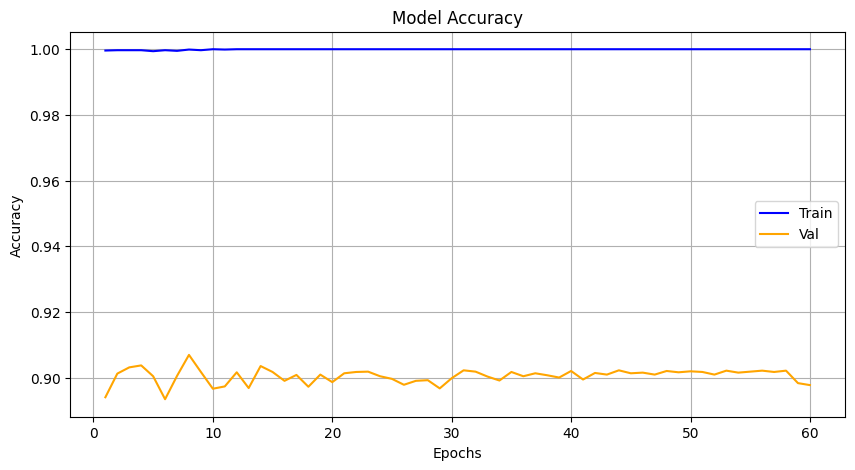

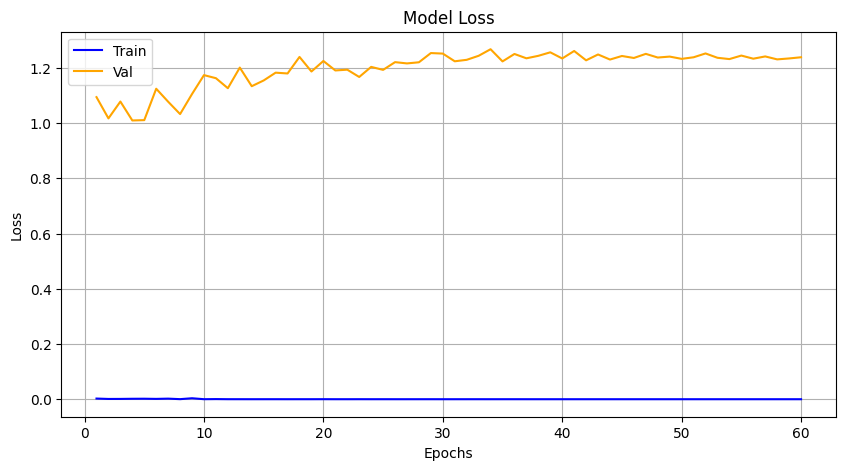

In [ ]:
import matplotlib.pyplot as plt

# Example training history (replace with your model's history)
history = {
    'accuracy': [0.9996, 0.9997, 0.9997, 0.9997, 0.9994, 0.9997, 0.9995, 0.9999, 0.9997, 1.0000,
0.9999, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000
],
    'val_accuracy': [0.8940, 0.9012, 0.9031, 0.9037, 0.9004, 0.8934, 0.9005, 0.9069, 0.9017, 0.8966, 0.8973, 0.9016, 0.8968, 0.9035, 0.9017, 0.8990, 0.9008, 0.8972, 0.9009, 0.8986, 0.9013, 0.9017, 0.9018, 0.9004, 0.8996, 0.8978, 0.8990, 0.8992, 0.8967, 0.8998, 0.9022, 0.9018, 0.9003, 0.8991, 0.9017, 0.9004, 0.9013, 0.9007, 0.9000, 0.9020, 0.8994, 0.9014, 0.9009, 0.9022, 0.9013, 0.9015, 0.9009, 0.9020, 0.9016, 0.9019, 0.9017, 0.9009, 0.9021, 0.9015, 0.9018, 0.9021, 0.9017,0.9021,0.8983,0.8977],
    'loss': [0.0024, 0.00098, 0.0011, 0.0016, 0.0018, 0.0012, 0.0021, 0.00026, 0.0035, 0.00010, 0.00049, 0.00009, 0.00006, 0.00002, 0.00004, 0.00006, 0.00001, 0.00003, 0.00004, 0.00012, 0.00002, 0.00001, 0.00008, 0.00002, 0.00004, 0.00001, 0.00001, 0.00002, 0.00004, 0.00000, 0.00001, 0.00002, 0.00003, 0.00001, 0.00002, 0.00003, 0.00001, 0.00001, 0.00001, 0.00000, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001,0.00001],
    'val_loss': [1.0940, 1.0170, 1.0780, 1.0095, 1.0107, 1.1244, 1.0774, 1.0326, 1.1053, 1.1737, 1.1626, 1.1263, 1.2010, 1.1336, 1.1544, 1.1826, 1.1797, 1.2396, 1.1868, 1.2249, 1.1906, 1.1934, 1.1670, 1.2035, 1.1927, 1.2207, 1.2161, 1.2202, 1.2536, 1.2517, 1.2238, 1.2291, 1.2437, 1.2675, 1.2234, 1.2503, 1.2346, 1.2436, 1.2563, 1.2340, 1.2611, 1.2273, 1.2485, 1.2301, 1.2430, 1.2358, 1.2507, 1.2374, 1.2408, 1.2326, 1.2383, 1.2522, 1.2365, 1.2318, 1.2445, 1.2332, 1.2414, 1.2307, 1.2341, 1.2384],
}

epochs = range(1, 61)

# Plot Model Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, history['accuracy'], label='Train', color='blue')
plt.plot(epochs, history['val_accuracy'], label='Val', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Model Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, history['loss'], label='Train', color='blue')
plt.plot(epochs, history['val_loss'], label='Val', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)
plt.show()


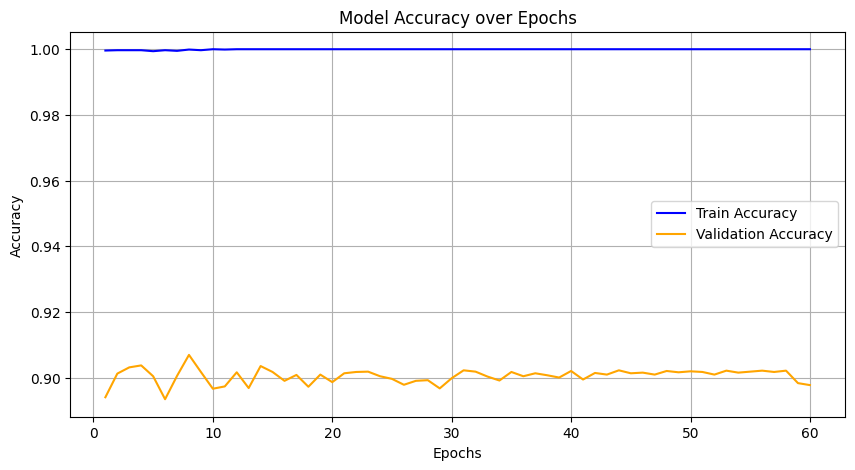

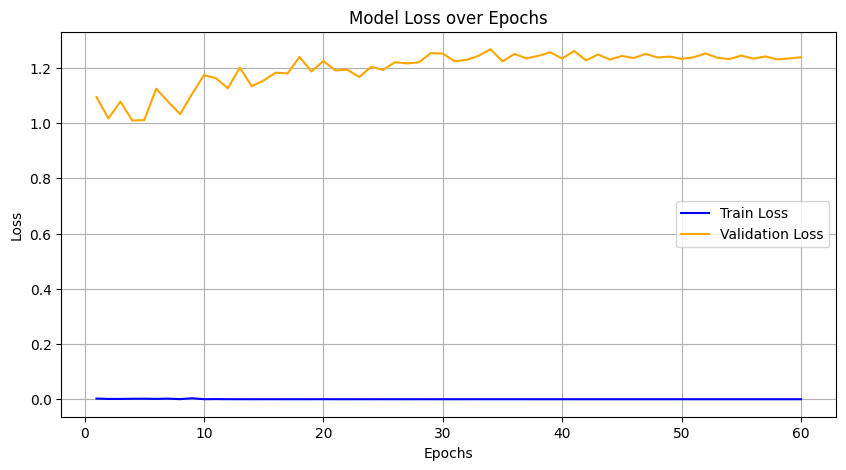

In [ ]:
import matplotlib.pyplot as plt

# Training history data
history = {
    'accuracy': [0.9996, 0.9997, 0.9997, 0.9997, 0.9994, 0.9997, 0.9995, 0.9999, 0.9997, 1.0000,
0.9999, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000
],
    'val_accuracy': [0.8940, 0.9012, 0.9031, 0.9037, 0.9004, 0.8934, 0.9005, 0.9069, 0.9017, 0.8966, 0.8973, 0.9016, 0.8968, 0.9035, 0.9017, 0.8990, 0.9008, 0.8972, 0.9009, 0.8986, 0.9013, 0.9017, 0.9018, 0.9004, 0.8996, 0.8978, 0.8990, 0.8992, 0.8967, 0.8998, 0.9022, 0.9018, 0.9003, 0.8991, 0.9017, 0.9004, 0.9013, 0.9007, 0.9000, 0.9020, 0.8994, 0.9014, 0.9009, 0.9022, 0.9013, 0.9015, 0.9009, 0.9020, 0.9016, 0.9019, 0.9017, 0.9009, 0.9021, 0.9015, 0.9018, 0.9021, 0.9017,0.9021,0.8983,0.8977],
    'loss': [0.0024, 0.00098, 0.0011, 0.0016, 0.0018, 0.0012, 0.0021, 0.00026, 0.0035, 0.00010, 0.00049, 0.00009, 0.00006, 0.00002, 0.00004, 0.00006, 0.00001, 0.00003, 0.00004, 0.00012, 0.00002, 0.00001, 0.00008, 0.00002, 0.00004, 0.00001, 0.00001, 0.00002, 0.00004, 0.00000, 0.00001, 0.00002, 0.00003, 0.00001, 0.00002, 0.00003, 0.00001, 0.00001, 0.00001, 0.00000, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001,0.00001],
    'val_loss': [1.0940, 1.0170, 1.0780, 1.0095, 1.0107, 1.1244, 1.0774, 1.0326, 1.1053, 1.1737, 1.1626, 1.1263, 1.2010, 1.1336, 1.1544, 1.1826, 1.1797, 1.2396, 1.1868, 1.2249, 1.1906, 1.1934, 1.1670, 1.2035, 1.1927, 1.2207, 1.2161, 1.2202, 1.2536, 1.2517, 1.2238, 1.2291, 1.2437, 1.2675, 1.2234, 1.2503, 1.2346, 1.2436, 1.2563, 1.2340, 1.2611, 1.2273, 1.2485, 1.2301, 1.2430, 1.2358, 1.2507, 1.2374, 1.2408, 1.2326, 1.2383, 1.2522, 1.2365, 1.2318, 1.2445, 1.2332, 1.2414, 1.2307, 1.2341, 1.2384],
}

epochs = range(1, 61)  # 60 epochs

# Plot Model Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot Model Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, history['loss'], label='Train Loss', color='blue')
plt.plot(epochs, history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install --upgrade tensorflow keras


In [ ]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow
import imageio
import random


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


video_path = "/content/ToWjusQ - Imgur.gif"
output_folder = "/content"


os.makedirs(output_folder, exist_ok=True)


gif = imageio.mimread(video_path)
frame_count = 0
face_count = 0

for frame in gif:
    frame_count += 1


    frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)


    gray = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        face_count += 1
        face = frame_bgr[y:y+h, x:x+w]
        face_filename = os.path.join(output_folder, f"face_{face_count}.jpg")
        cv2.imwrite(face_filename, face)


    for (x, y, w, h) in faces:
        color = [random.randint(0, 255) for _ in range(3)]
        cv2.rectangle(frame_bgr, (x, y), (x + w, y + h), color, 3)


    cv2_imshow(frame_bgr)

print(f"Total Faces Extracted: {face_count}")
print(f"Faces saved in '{output_folder}'")


Output hidden; open in https://colab.research.google.com to view.

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


<ipython-input-15-659989fa958a>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = np.argmax(prediction, axis=1)[0] if prediction.shape[1] > 1 else int(prediction[0] > 0.5)


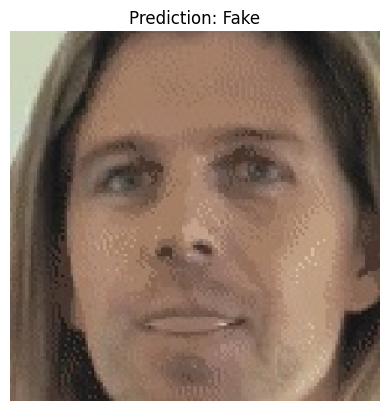

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image



model = tf.keras.models.load_model("/content/drive/MyDrive/xception.keras")



image_path = "/content/face_1.jpg"
img = image.load_img(image_path, target_size=(299, 299))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)


prediction = model.predict(img_array)


class_labels = ["Fake", "Real"]


predicted_class = np.argmax(prediction, axis=1)[0] if prediction.shape[1] > 1 else int(prediction[0] > 0.5)
prediction_label = class_labels[predicted_class]


plt.imshow(img)
plt.axis("off")
plt.title(f"Prediction: {prediction_label}")
plt.show()


In [ ]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow
import imageio
import random


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


video_path = "/content/id17_0001.mp4"
output_folder = "/content"


os.makedirs(output_folder, exist_ok=True)


gif = imageio.mimread(video_path)
frame_count = 0
face_count = 0

for frame in gif:
    frame_count += 1


    frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)


    gray = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        face_count += 1
        face = frame_bgr[y:y+h, x:x+w]
        face_filename = os.path.join(output_folder, f"face_{face_count}.jpg")
        cv2.imwrite(face_filename, face)


    for (x, y, w, h) in faces:
        color = [random.randint(0, 255) for _ in range(3)]
        cv2.rectangle(frame_bgr, (x, y), (x + w, y + h), color, 3)


    cv2_imshow(frame_bgr)

print(f"Total Faces Extracted: {face_count}")
print(f"Faces saved in '{output_folder}'")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


<ipython-input-27-20fc373b05f8>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = np.argmax(prediction, axis=1)[0] if prediction.shape[1] > 1 else int(prediction[0] > 0.5)


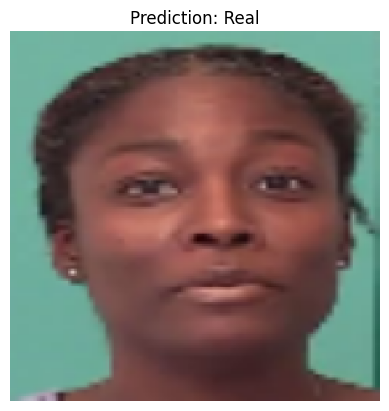

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image



model = tf.keras.models.load_model("/content/drive/MyDrive/xception.keras")



image_path = "/content/dfdc-faces-of-the-train-sample/validation/real/atkdltyyen_0_0.png"
img = image.load_img(image_path, target_size=(299, 299))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)


prediction = model.predict(img_array)


class_labels = ["Fake", "Real"]


predicted_class = np.argmax(prediction, axis=1)[0] if prediction.shape[1] > 1 else int(prediction[0] > 0.5)
prediction_label = class_labels[predicted_class]


plt.imshow(img)
plt.axis("off")
plt.title(f"Prediction: {prediction_label}")
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model("/content/drive/MyDrive/xception.keras")


In [ ]:
import pickle

# history_finetune is already a dictionary containing the history data
history_finetune = {
    'accuracy': [0.9996, 0.9997, 0.9997, 0.9997, 0.9994, 0.9997, 0.9995, 0.9999, 0.9997, 1.0000, 0.9999, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.00001],
    'val_accuracy': [0.8940, 0.9012, 0.9031, 0.9037, 0.9004, 0.8934, 0.9005, 0.9069, 0.9017, 0.8966, 0.8973, 0.9016, 0.8968, 0.9035, 0.9017, 0.8990, 0.9008, 0.8972, 0.9009, 0.8986, 0.9013, 0.9017, 0.9018, 0.9004, 0.8996, 0.8978, 0.8990, 0.8992, 0.8967, 0.8998, 0.9022, 0.9018, 0.9003, 0.8991, 0.9017, 0.9004, 0.9013, 0.9007, 0.9000, 0.9020, 0.8994, 0.9014, 0.9009, 0.9022, 0.9013, 0.9015, 0.9009, 0.9020, 0.9016, 0.9019, 0.9017, 0.9009, 0.9021, 0.9015, 0.9018, 0.9021, 0.9017, 0.9021, 0.8983, 0.8977],
    # ... (other metrics from your training history) ...
}

# Save the history_finetune dictionary directly
with open("history.pkl", "wb") as f:
    pickle.dump(history_finetune, f)  # No need for .history

# Load history dictionary
with open("history.pkl", "rb") as f:
    history = pickle.load(f)

In [ ]:
train_acc = history['accuracy']       # Training accuracy
val_acc = history['val_accuracy']     # Validation accuracy
epochs = range(1, len(train_acc) + 1) # Number of epochs


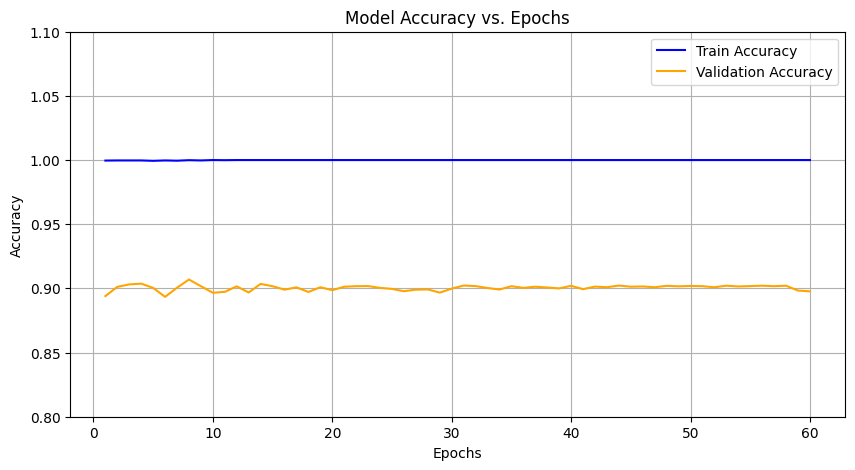

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

epochs = range(1, len(val_acc) + 1)


plt.plot(epochs, train_acc[:len(epochs)], label="Train Accuracy", color="blue")
plt.plot(epochs, val_acc, label="Validation Accuracy", color="orange")


plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy vs. Epochs")
plt.legend()
plt.grid(True)
plt.ylim(0.80, 1.1)

plt.show()

In [ ]:
from tensorflow.keras.applications.xception import preprocess_input

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


NameError: name 'ImageDataGenerator' is not defined

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load your trained Xception model
model = load_model('/content/drive/MyDrive/xception.keras')  # Update path as needed

# Create a data generator for test data
test_dir = '/content/dfdc-faces-of-the-train-sample/validation' # This folder should have 'real/' and 'fake/' subfolders
img_size = (299, 299)
batch_size = 32

test_datagen = ImageDataGenerator(preprocessing_function=None)  # Set your preprocess_input if needed

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Get predictions
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred) * 100
precision = precision_score(y_true, y_pred) * 100
recall = recall_score(y_true, y_pred) * 100
f1 = f1_score(y_true, y_pred) * 100

# Print results
print(f"Accuracy:  {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall:    {recall:.2f}%")
print(f"F1 Score:  {f1:.2f}%")

Found 30794 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


963/963 ━━━━━━━━━━━━━━━━━━━━ 87s 88ms/step
Accuracy:  80.42%
Precision: 0.00%
Recall:    0.00%
F1 Score:  0.00%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input  # Import preprocessing

# Load model
model = load_model('/content/drive/MyDrive/xception.keras')

# Test data generator WITH preprocessing
test_dir = '/content/dfdc-faces-of-the-train-sample/validation'
img_size = (299, 299)
batch_size = 32

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)  # Preprocessing added

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Check class label mapping
print("Class indices (real=0, fake=1):", test_generator.class_indices)

# Get predictions
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Check prediction distribution
unique, counts = np.unique(y_pred, return_counts=True)
print("Prediction distribution:", dict(zip(unique, counts)))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred) * 100
precision = precision_score(y_true, y_pred, zero_division=0) * 100  # Handle division by zero
recall = recall_score(y_true, y_pred, zero_division=0) * 100
f1 = f1_score(y_true, y_pred, zero_division=0) * 100

# Print results
print(f"Accuracy:  {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall:    {recall:.2f}%")
print(f"F1 Score:  {f1:.2f}%")

Found 30794 images belonging to 2 classes.
Class indices (real=0, fake=1): {'fake': 0, 'real': 1}


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


963/963 ━━━━━━━━━━━━━━━━━━━━ 98s 94ms/step
Prediction distribution: {np.int64(0): np.int64(30794)}
Confusion Matrix:
 [[24765     0]
 [ 6029     0]]
Accuracy:  80.42%
Precision: 0.00%
Recall:    0.00%
F1 Score:  0.00%


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import numpy as np


# Load the model
model = load_model('/content/drive/MyDrive/xception.keras')

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# Create the validation generator (IMPORTANT: must use preprocess_input for Xception)


val_generator = val_datagen.flow_from_directory(
    '/content/dfdc-faces-of-the-train-sample/validation',
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# True labels
y_true = val_generator.classes

# Predictions
y_pred_prob = model.predict(val_generator)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()
print("Confusion Matrix:\n", cm)

# Manual Precision
precision_manual = tp / (tp + fp) if (tp + fp) > 0 else 0
print(f"Manual Precision: {precision_manual * 100:.2f}%")

# Using sklearn
precision = precision_score(y_true, y_pred, zero_division=0) * 100
recall = recall_score(y_true, y_pred, zero_division=0) * 100
f1 = f1_score(y_true, y_pred, zero_division=0) * 100
accuracy = accuracy_score(y_true, y_pred) * 100

print(f"Accuracy:  {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall:    {recall:.2f}%")
print(f"F1 Score:  {f1:.2f}%")


Found 30794 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


963/963 ━━━━━━━━━━━━━━━━━━━━ 93s 94ms/step
Confusion Matrix:
 [[24765     0]
 [ 6029     0]]
Manual Precision: 0.00%
Accuracy:  80.42%
Precision: 0.00%
Recall:    0.00%
F1 Score:  0.00%


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np


In [ ]:
data_dir = "/content/dfdc-faces-of-the-train-sample"
train_dir = f"{data_dir}/train"
val_dir = f"{data_dir}/validation"


In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(299, 299), batch_size=32, class_mode="binary"
)

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(299, 299), batch_size=32, class_mode="binary", shuffle=False
)


Found 93853 images belonging to 2 classes.
Found 30794 images belonging to 2 classes.


In [ ]:
base_model = applications.Xception(weights="imagenet", include_top=False, input_shape=(299, 299, 3))
base_model.trainable = False  # Freeze base initially

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid"),
])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Reload if needed
model = models.load_model('/content/drive/MyDrive/xception.keras')

# Get ground truth and predictions
y_true = val_generator.classes
y_pred_prob = model.predict(val_generator)
y_pred = (y_pred_prob > 0.3).astype(int).flatten()

# Confusion matrix and metrics
cm = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred) * 100
precision = precision_score(y_true, y_pred) * 100
recall = recall_score(y_true, y_pred) * 100
f1 = f1_score(y_true, y_pred) * 100

# Print results
print("Confusion Matrix:\n", cm)
print(f"Accuracy:  {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall:    {recall:.2f}%")
print(f"F1 Score:  {f1:.2f}%")

963/963 ━━━━━━━━━━━━━━━━━━━━ 84s 84ms/step
Confusion Matrix:
 [[22422  2343]
 [  825  5204]]
Accuracy:  89.71%
Precision: 68.95%
Recall:    86.32%
F1 Score:  76.66%


In [ ]:
model = models.load_model('/content/drive/MyDrive/xception.keras')
base_model.trainable = True  # Unfreeze for fine-tuning

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_finetune = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
    callbacks=[lr_scheduler, early_stopping]
)


Epoch 1/5
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 1937s 647ms/step - accuracy: 0.9873 - loss: 0.0609 - val_accuracy: 0.8936 - val_loss: 1.0920 - learning_rate: 1.0000e-05
Epoch 2/5
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 1860s 634ms/step - accuracy: 0.9909 - loss: 0.0281 - val_accuracy: 0.8879 - val_loss: 1.1409 - learning_rate: 1.0000e-05
Epoch 3/5
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 1844s 629ms/step - accuracy: 0.9917 - loss: 0.0247 - val_accuracy: 0.8953 - val_loss: 1.0670 - learning_rate: 1.0000e-05
Epoch 4/5
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 1858s 634ms/step - accuracy: 0.9932 - loss: 0.0199 - val_accuracy: 0.9003 - val_loss: 0.9652 - learning_rate: 1.0000e-05
Epoch 5/5
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 1862s 635ms/step - accuracy: 0.9944 - loss: 0.0162 - val_accuracy: 0.8925 - val_loss: 0.9852 - learning_rate: 1.0000e-05
Restoring model weights from the end of the best epoch: 4.


In [ ]:
model.save('/content/drive/MyDrive/xception.keras')